# Prediction of Test Dataset

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import model
import data_loader
import loss
import tester

In [2]:
# root_path = 'D://Data/massachusetts-roads-dataset/'
root_path = '/home/renyan/ossdata/massachusetts-roads-dataset/'
road_path = root_path + "tiff_select2_parts_16/"
DIR_CHECKPOINT = 'checkpoints/'
TEST_SAVE_PATH = '/home/renyan/road-extraction/predict_result/'

In [3]:
INPUT_SIZE, OUTPUT_SIZE = 256, 256
test_dataset = data_loader.RoadDataset(road_path, INPUT_SIZE, OUTPUT_SIZE, data_class = 'test')

test dataset set: 784 pairs


In [4]:
net = model.LinkNet34()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tt = tester.Tester(net = net, 
                   device = device, 
                   dir_stat = 'v2_linknet34_re_repoch20.pth', 
                   test_dataset = test_dataset,
                   threshold = 0.5,
                   save_path = TEST_SAVE_PATH, 
                   dir_checkpoint = DIR_CHECKPOINT)

Tester with net para in v2_linknet34_re_repoch20.pth is ready 
(threshold = 0.5, 784 pairs in test dataset)


In [42]:
# img, lbl = next(iter(tt.test_loader))
# show img & label * prediction
# tt.test_one(img, lbl, show = True, combine = False, verbose = False, save_name = None);
# show img combined with prediction (overlay)
# tt.test_one(img, lbl, show = True, combine = True, verbose = False, save_name = None);

## Save Results

In [43]:
tt.test_score()

100%|██████████| 784/784 [03:17<00:00,  3.96it/s]

current threshold: 0.5
mean dice: 0.5846566375265476
mean iou: 0.46132599206545394


In [7]:
# import pickle
# with open('tmp_tt.pickle', 'rb') as f:  
#     tt = pickle.load(f)

In [6]:
tt.save(subfolder = "test_result/linknet34_re_epoch20/")

100%|██████████| 784/784 [00:01<00:00, 520.05it/s]


## Good & Bad Prediction Examples

In [8]:
len(tt.pred_list)

784

In [9]:
print(np.where(tt.dice_score >= np.quantile(tt.dice_score, 0.95)), '\n',
     np.where(tt.iou_score >= np.quantile(tt.iou_score, 0.95)))

(array([  3,  36,  37,  44,  52,  64,  78,  79,  80,  99, 125, 142, 152,
       205, 207, 223, 226, 241, 248, 250, 252, 264, 268, 283, 297, 300,
       301, 326, 327, 331, 332, 335, 341, 510, 514, 540, 564, 573, 669,
       769]),) 
 (array([  3,  36,  37,  44,  52,  64,  78,  79,  80,  99, 125, 142, 152,
       205, 207, 223, 226, 241, 248, 250, 252, 264, 268, 283, 297, 300,
       301, 326, 327, 331, 332, 335, 341, 510, 514, 540, 564, 573, 669,
       769]),)


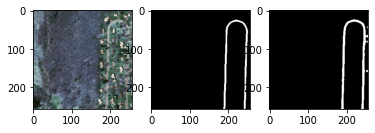

In [11]:
# good prediction
tt.test_idx(78, combine = False)

In [12]:
print(np.where(tt.dice_score == np.min(tt.dice_score)), '\n', np.where(tt.iou_score == np.min(tt.iou_score)))

(array([  6,   7,  31,  41,  67,  75,  95,  96, 106, 109, 110, 113, 114,
       117, 118, 119, 122, 129, 130, 131, 133, 134, 135, 139, 140, 143,
       145, 149, 159, 178, 179, 182, 183, 184, 188, 189, 190, 218, 224,
       227, 235, 238, 239, 244, 245, 260, 261, 281, 282, 291, 311, 314,
       317, 318, 319, 359, 360, 364, 365, 366, 373, 380, 406, 407, 501,
       505, 509, 511, 516, 517, 521, 522, 526, 527, 554, 558, 559, 562,
       563, 589, 591, 640, 659, 701, 710, 713, 721, 729, 746, 755, 778,
       779, 781, 782, 783]),) 
 (array([  6,   7,  31,  41,  67,  75,  95,  96, 106, 109, 110, 113, 114,
       117, 118, 119, 122, 129, 130, 131, 133, 134, 135, 139, 140, 143,
       145, 149, 159, 178, 179, 182, 183, 184, 188, 189, 190, 218, 224,
       227, 235, 238, 239, 244, 245, 260, 261, 281, 282, 291, 311, 314,
       317, 318, 319, 359, 360, 364, 365, 366, 373, 380, 406, 407, 501,
       505, 509, 511, 516, 517, 521, 522, 526, 527, 554, 558, 559, 562,
       563, 589, 591, 640, 659

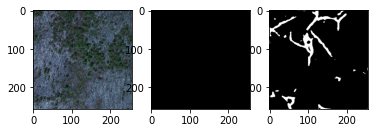

In [13]:
tt.test_idx(6, combine = False)